Problem Set Instructions
----

For the following problems identify the dimensionality, if it's convex optimization, if there are constraints/bounds and if you're being asked to find a root or minimum. Then list the matching type of optimization method (*the name, not the python function name*) you should use and rearrange any equations to match the method (e.g., transform your constraints so that they are satisfied at 0 or make transform your equations so that they are solved when equal to 0). In the second Python cell solve the problem. Make sure that you print out a string describing exactly the correct answer. **Do not simply print the result of the optimization call**. For example:

```python
result = minimize(...)
print('The x value that minimizes the function is {:.5f}'.format(result.x))
```

#### Problem 1

Using optimization, solve the following equation:

$$
5x^3 - 2x^2  = 11
$$

1D, convex, root-finding

$$
5x^3 - 2x^2 - 11 = 0
$$

In [27]:
from scipy.optimize import newton

x = newton(lambda x: 5 * x**3 - 2 * x**2 - 11, x0=1)
print('x = {:.5f}'.format(x))

x = 1.44852


#### Problem 2

Using optimization solve the following equation:

$$
\int_{-\infty}^x e^{-s^2} = 0.25
$$


1D, convex, root-fniding

In [28]:
from scipy.integrate import quad
import numpy as np

x = newton(lambda x: quad(lambda y: np.exp(-y**2), -np.inf,x)[0] - 0.25, x0=0)
print('x = {:.3f}'.format(x))

x = -0.761


#### Problem 3

Find the maximum value of $g(x,y)$ where both $x$ and $y$ are between 0 and 1:

$$
g(x,y) = \exp\left(-\frac{(x - 0.2)^2}{4}\right)\exp\left(-\frac{(x - y)^2}{5}\right) \exp\left(-\frac{(y - 0.7)^2}{4}\right)
$$

2D, convex, minimization


In [29]:
from scipy.optimize import minimize
def obj(z):
    x = z[0]
    y = z[1]
    #return negative to allow max
    return -np.exp(-(x - 0.2)**2 / 4) * np.exp(-(x - y)**2 / 5) * np.exp(-(y - 0.7)**2 / 4)
result = minimize(obj, x0=[0.5, 0.5], bounds=[(0, 1), (0,1)])
print('The minimizing x,y are x = {:.3f}, y = {:.3f}'.format(*result.x))

The minimizing x,y are x = 0.354, y = 0.546


#### Problem 4

$x$ and $y$ lie inside a disc with radius $3 \geq r \geq 5$. Find the point within the disc that minimizes the distance to (-6, 2). Modify the code to add your optimum point along with an entry in the legend. Complete the problem in Cartesian coordinates.

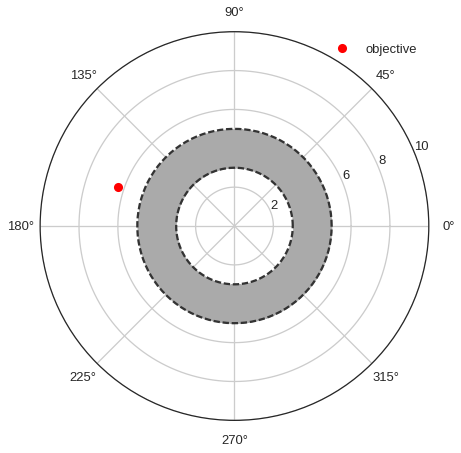

In [106]:
import matplotlib.pyplot as plt
import matplotlib

#use nice style with larger plot size
matplotlib.style.use(['seaborn-white', 'seaborn-talk'])
#set-up our points
theta = np.linspace(0, 2 * np.pi, 100)
r = np.repeat(3, len(theta))
#plot the disc boundaries
plt.polar(theta, r, linestyle='--', color='#333333')
plt.polar(theta, r + 2, linestyle='--', color='#333333')
#plot the inside of the disc
plt.fill_between(theta, r, r + 2, color='#AAAAAA')
#plot the point
plt.plot(np.arctan2(2, -6), np.sqrt((-6)**2 + 2**2), 'ro', label='objective')
#give some whitespace
plt.gca().set_rmax(10)
#add legend
plt.legend(loc='best')
plt.show()

2D, convex, constrained, minimization. Constraints:

$$
x^2 + y^2 - 3^2 \geq 0
$$

$$
-x^2 - y^2 + 5^2 \geq 0
$$

In [88]:
#Optimization Code

### BEGIN SOLUTION
ineq_1 = lambda x: x[0]**2 + x[1]**2 - 3**2 
ineq_2 = lambda x: -(x[0]**2 + x[1]**2 - 5**2)
constraints = [{'type':'ineq', 'fun':ineq_1},
                {'type':'ineq', 'fun':ineq_2}]

result = minimize(lambda x: (x[0] - -6)**2 + (x[1] - 2)**2, constraints=constraints, x0=[0,0])
print('The minimum coordinates are x = {:.3f} and y = {:.3f}'.format(*result.x))
###END SOLUTION

The minimum coordinates are x = -4.743 and y = 1.581


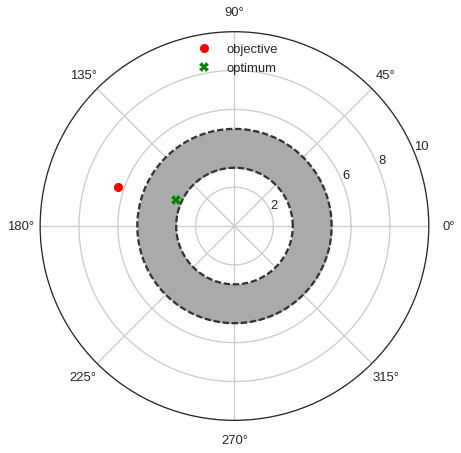

In [108]:
#Your plot Code

### BEGIN SOLUTION
import matplotlib.pyplot as plt
import matplotlib

#use nice style with larger plot size
matplotlib.style.use(['seaborn-white', 'seaborn-talk'])
#set-up our points
theta = np.linspace(0, 2 * np.pi, 100)
r = np.repeat(3, len(theta))
#plot the disc boundaries
plt.polar(theta, r, linestyle='--', color='#333333')
plt.polar(theta, r + 2, linestyle='--', color='#333333')
#plot the inside of the disc
plt.fill_between(theta, r, r + 2, color='#AAAAAA')
#plot the point
plt.plot(np.arctan2(2, -6), np.sqrt((-6)**2 + 2**2), 'ro', label='objective')
plt.plot(np.arctan2(result.x[1], result.x[0]), np.linalg.norm(result.x), 'gX', label='optimum')
#give some whitespace
plt.gca().set_rmax(10)
#add legend
plt.legend(loc='upper center')
plt.show()
### END SOLUTION

#### Problem 5

Repeat the previous problem except now you must minimize the distance to three points: (-6, 2), (4,2), (-7, 0)

In [143]:
#optimization

### BEGIN SOLUTION
def obj(x):
    s = 0
    for p in [[-6,2], [4,2], [-7, 0]]:
        s += (x[0] - p[0])**2 + (x[1] - p[1])**2
    return s
result = minimize(obj, constraints=constraints, x0=[0,0])
print('The minimum coordinates are x = {:.3f} and y = {:.3f}'.format(*result.x))
### END SOLUTION

The minimum coordinates are x = -3.000 and y = 1.333


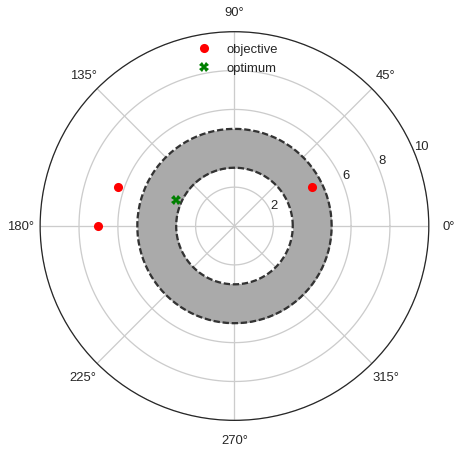

In [144]:
#Your plot Code

### BEGIN SOLUTION
import matplotlib.pyplot as plt
import matplotlib

#use nice style with larger plot size
matplotlib.style.use(['seaborn-white', 'seaborn-talk'])
#set-up our points
theta = np.linspace(0, 2 * np.pi, 100)
r = np.repeat(3, len(theta))
#plot the disc boundaries
plt.polar(theta, r, linestyle='--', color='#333333')
plt.polar(theta, r + 2, linestyle='--', color='#333333')
#plot the inside of the disc
plt.fill_between(theta, r, r + 2, color='#AAAAAA')
#plot the point
plt.plot(np.arctan2(2, -6), np.sqrt((-6)**2 + 2**2), 'ro', label='objective')
plt.plot(np.arctan2(2, 4), np.sqrt((4)**2 + 2**2), 'ro')
plt.plot(np.arctan2(0, -7), np.sqrt((-7)**2 + 0**2), 'ro',)
plt.plot(np.arctan2(result.x[1], result.x[0]), np.linalg.norm(result.x), 'gX', label='optimum')
#give some whitespace
plt.gca().set_rmax(10)
#add legend
plt.legend(loc='upper center')
plt.show()
### END SOLUTION

#### Problem 6

The free energy of mixing is given by the following equation in phase equilibrium theory:

$$
\Delta F = x\ln x + (1 - x)\ln (1 - x) + \chi_{AB}x(1 - x) + \beta x
$$

where x is the mole fraction of component A, $\chi_{AB}$ is the interaction parameter, and $\beta$ is a system correction. Find the mole fraction of component A at which the free energy of mixing is minimized. Use $\chi_{AB} = 3$ and $\beta = 0.05$. Use bashinhopping.

1D, non-convex (see plot below), bounded, minimization

The lowest free energy of mixing is at x = 0.06559


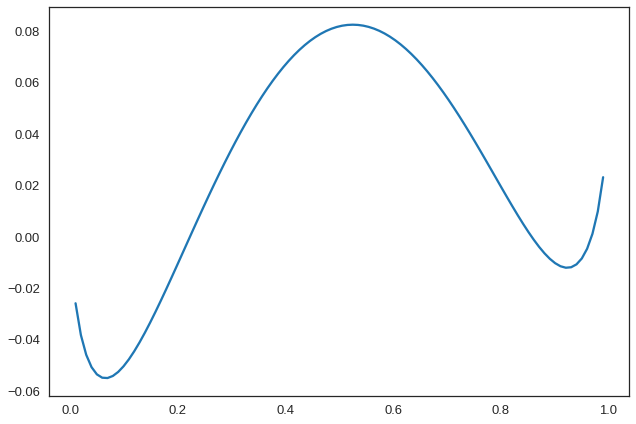

In [145]:
#make a plot to see if it's convex
chi = 3
x = np.linspace(0.01,0.99, 100)
F = x * np.log(x) + (1 - x) * np.log(1 - x) + chi * x * (1 - x) + 0.05 * x
plt.plot(x,F)

#looks nonconvex
from scipy.optimize import basinhopping

def f(x):
    return x * np.log(x) + (1 - x) * np.log(1 - x) + 3 * x * (1 - x) + 0.05 * x

result = basinhopping(f, x0=0.5, minimizer_kwargs={'bounds': [(0.001,0.999)]})
print('The lowest free energy of mixing is at x = {:.5f}'.format(*result.x))